# MBAN 6400 Group Project(Part B)

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from scipy.cluster.vq import whiten,vq,kmeans
import seaborn as sns
from sklearn.model_selection import ParameterGrid
from sklearn import metrics


In [2]:
# drop discrete variables
data1 = pd.read_csv('new_data.csv')
data = data1.drop(columns = ['Unnamed: 0','PAID_FULL', 'TENURE_6.0', 'TENURE_7.0', 'TENURE_8.0', 'TENURE_9.0',
       'TENURE_10.0', 'TENURE_11.0', 'TENURE_12.0'])

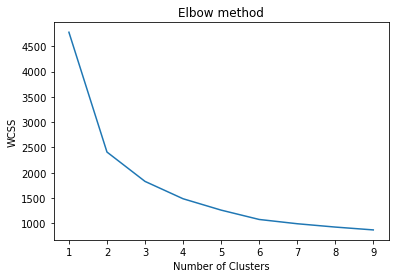

In [3]:
# KMeans Model
kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(data) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Parameter: {'n_clusters': 2} Score 0.44856777958483746
Parameter: {'n_clusters': 3} Score 0.444109912192546
Parameter: {'n_clusters': 4} Score 0.3907488782060436
Parameter: {'n_clusters': 5} Score 0.3946774460238202
Parameter: {'n_clusters': 6} Score 0.39185548416212557
Parameter: {'n_clusters': 7} Score 0.36539935073904845
Parameter: {'n_clusters': 8} Score 0.33440963067081997
Parameter: {'n_clusters': 9} Score 0.3371297413402625


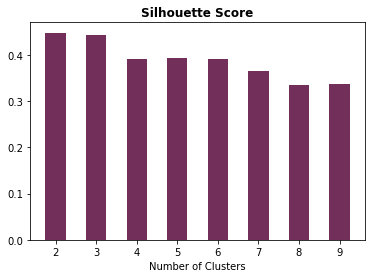

In [4]:
# candidate values for our number of cluster
parameters = [2,3, 4, 5,6,7,8,9]
# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans()     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(data)          # fit model on wine dataset, this will find clusters based on parameter p
    ss = metrics.silhouette_score(data, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [ss]       # store all the scores
    print('Parameter:', p, 'Score', ss)
    # check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p
# plotting silhouette score
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()

In [5]:
# PCA 2 components
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(data)
PCA_components = pd.DataFrame(pca_2_result)

print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))


print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))



Explained variation per principal component: [0.59875215 0.17503195]
Cumulative variance explained by 2 principal components: 77.38%


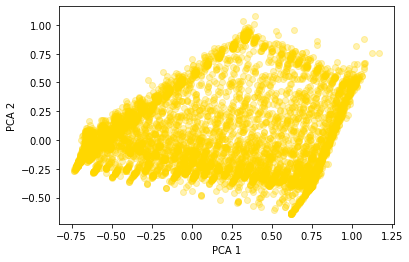

In [6]:
plt.scatter([item[0] for item in pca_2_result], [item[1] for item in pca_2_result], alpha=.3, color='gold')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

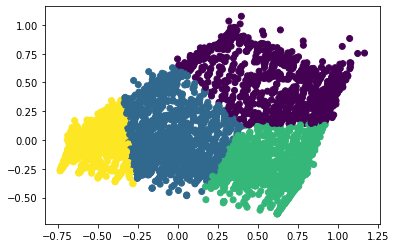

In [7]:
# fitting KMeans    
optimum_num_clusters = 4
model = KMeans(n_clusters=optimum_num_clusters)
model.fit(PCA_components.iloc[:,:2])
labels = model.predict(PCA_components.iloc[:,:2])
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

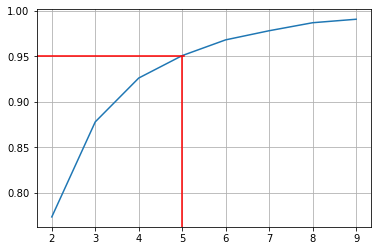

In [8]:
# PCA n components
explained = []
for i in [2,3,4,5,6,7,8,9]:
    pca_3 = PCA(n_components=i)
    pca_3_result = pca_3.fit_transform(data)
    PCA_components = pd.DataFrame(pca_3_result)
    explained.append(np.sum(pca_3.explained_variance_ratio_))

plt.plot([2,3,4,5,6,7,8,9],explained)
plt.axvline(x=5,ymin =0, ymax = 0.78,color='r')
plt.axhline(y=0.95, xmin=0, xmax = 0.44,color='r')
plt.grid()
plt.show()



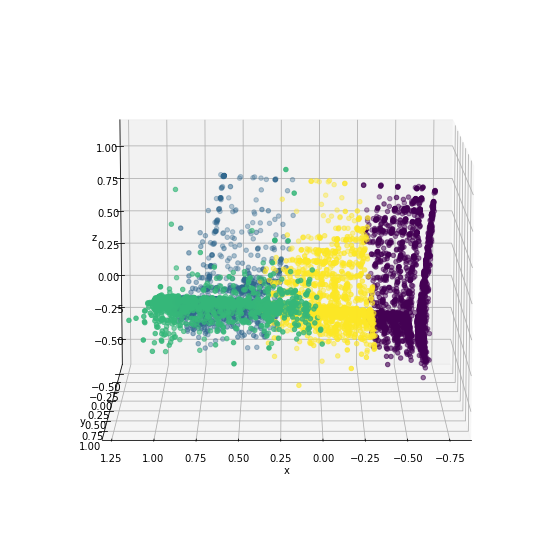

In [9]:
from past.builtins import xrange
pca_3 = PCA(n_components=5)
pca_3_result = pca_3.fit_transform(data)
x = [item[0] for item in pca_3_result]
y = [item[1] for item in pca_3_result]
z = [item[2] for item in pca_3_result]

from mpl_toolkits.mplot3d import Axes3D
optimum_num_clusters = 4
model = KMeans(n_clusters=optimum_num_clusters)
model.fit(PCA_components.iloc[:,:2])
labels = model.predict(PCA_components.iloc[:,:2])
x = [item[0] for item in pca_3_result]
y = [item[1] for item in pca_3_result]
z = [item[2] for item in pca_3_result]
fig = plt.figure(figsize=(10,10))


ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z,c=labels)
ax.set_xlabel("x")

ax.set_ylabel("y")

ax.set_zlabel("z")
ax.view_init(elev=10., azim=90)

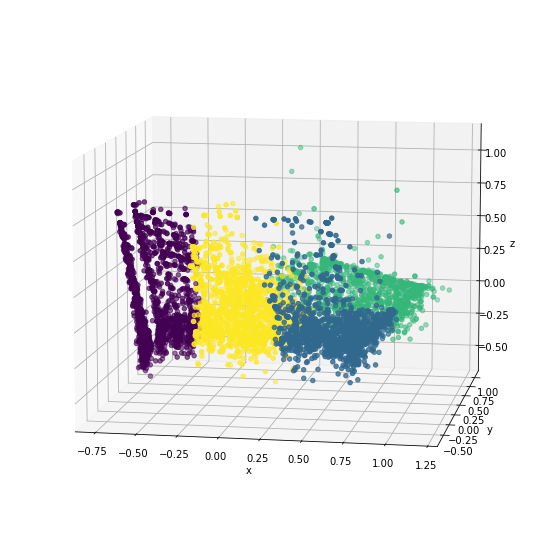

In [10]:
fig = plt.figure(figsize=(10,10))

bx = fig.add_subplot(111, projection='3d')
bx.scatter(x,y,z,c=labels)
bx.set_xlabel("x")

bx.set_ylabel("y")

bx.set_zlabel("z")
bx.view_init(elev=10., azim=280)

In [11]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'ONEOFFPURCHASES_TOTAL',
       'TOTAL_OWED', 'PCT_PAID'],
      dtype='object')

In [12]:
from scipy.stats import pearsonr
c= []
p =[]
for a in pca_3_result.T.tolist():
    for b in data.values.T:
        corr, p_value = pearsonr(a,b)
        c.append(corr)

In [13]:
df = pd.DataFrame(columns=['component_1', 'component_2', 'component_3','component_4','component_5'], index=data.columns)

for i in range(5):
    df.iloc[:,i] = np.array_split(c,5)[i]

In [14]:
df.style.background_gradient(cmap="viridis_r")

,component_1,component_2,component_3,component_4,component_5
BALANCE,-0.045914,0.225706,-0.474350,0.635587,0.159446
BALANCE_FREQUENCY,0.267682,0.280492,-0.890844,-0.227329,0.058577
PURCHASES,0.429999,0.349520,0.040021,0.301528,0.306732
ONEOFF_PURCHASES,0.279334,0.459737,0.073566,0.243203,0.257864
INSTALLMENTS_PURCHASES,0.503381,-0.018294,-0.040437,0.266007,0.251474
CASH_ADVANCE,-0.205532,0.085204,-0.313315,0.604310,-0.243698
PURCHASES_FREQUENCY,0.982135,0.056298,0.061130,-0.048054,-0.062464
ONEOFF_PURCHASES_FREQUENCY,0.466687,0.856969,0.182390,0.000536,-0.016694
PURCHASES_INSTALLMENTS_FREQUENCY,0.925575,-0.344801,-0.045125,0.078179,0.025974
CASH_ADVANCE_FREQUENCY,-0.298219,0.110954,-0.446449,0.544236,-0.614357


### The first principal component analysis
The first principal component is strongly correlated with four of the original variables. The first principal component increases with increasing INSTALLMENTS_PURCHASES, PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and PURCHASES_TRX. 

This suggests that these four criteria vary together. If one increases, then the remaining ones tend to increase as well.

Furthermore, we see that the first principal component correlates most strongly with the PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY. 

In fact, we could state that based on the correlation of PURCHASES_FREQUENCY(0.982), as from Part A of the project, both variables are highly correlated.

### The seconnd principal component analysis
The first principal component is strongly correlated with 1 of the original variables ONEOFF_PURCHASES_FREQUENCY.

### The third principal component analysis
The first principal component is negatively strongly correlated with 1 of the original variables. BALANCE_FREQUENCY.

### The fourth principal component analysis
The first principal component is strongly correlated with 7 of the original variables. BALANCE, CASH_ADVANCE, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX,CREDIT_LIMIT, PAYMENTS, TOTAL_OWED

### The fifth principal component analysis
The first principal component is negatively strongly correlated with 7 of the original variables. CASH_ADVANCE_FREQUENCY and CASH_ADVANCE_TRX

In [16]:
len(labels)


8950

In [20]:
data1['cluster'] = labels

In [21]:
data1.to_csv('cluster_data.csv')